For this kernel, I will try different machine learning classification models to predict the survival in the Titanic tragety.

1. The simple logistic regression has prediction score 0.74641, rank 9565, bad
1. The Support Vector Classification with GridSearchCV  has scored 0.79, ranked up 2373
1. The Support Vector Classification with with normalized numeric feature,   has scored 0.78947, ranked up 4448
1. Random forest classifier

* I am still working on improving this kernel. I will keep updating my tries and whether they work or not. 
* If you think my kernel is helpful, please give me a voteup. This is very important for new people like me. Thank you in advance.
* If you have any question, please feel free to leave me a message, I will check every day. Thank you so much.


## Part 1: Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import scipy.stats as stats

## Part 2: Load the train and test data and check data

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
# Check number of observations in the train and test data
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
# check the columns in train and test
print(train.columns)
print(test.columns)
print('\n')
print('Variables in test but not in train is: ', set(train.columns)-set(test.columns))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Variables in test but not in train is:  {'Survived'}


In [5]:
# Check the first and last five observations of train and test data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Check data type and NAN value
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

In [8]:
# Check basic descriptive information for numeric features
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Part 3: Data Visualization and feature selection

### 3.1 Count plot to check how many people died

* Survival 0 = No, 1 = Yes
* We can see that about 62% died and 38% alive

0    0.616162
1    0.383838
Name: Survived, dtype: float64

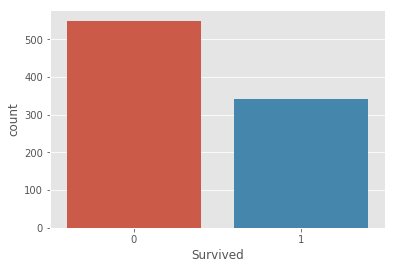

In [9]:
sns.countplot(x=train['Survived'])
train['Survived'].value_counts(normalize=True)

### 3.2 Check whether the survival has any relationship with Gender
* From the count plot and two way contigency table, 74% of female survive and only 19% of male survive.
* Female are more likely to survive in the Titanic tragedy

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


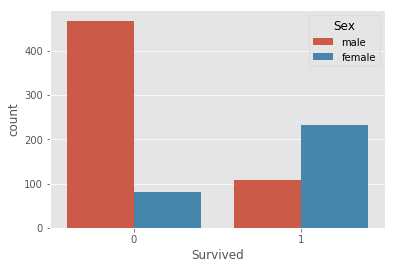

In [10]:
sns.countplot(train['Survived'], hue=train['Sex'])
# Add contigency table for Sex by Survived
pd.crosstab(train['Sex'],train['Survived'], normalize='index')

### 3.3 Check the relationship between Survival and Economic class

pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

From the Count plot and contigency table, 
* Upper class with Pclass=1 has survival rate 63%
* Middle class with Pclass=2 has survival rate 47%
* Lower class with Pclass=3 has survival rate of only 24%

So Higher Economic class people are more likely to survive than people in lower Economic class 

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


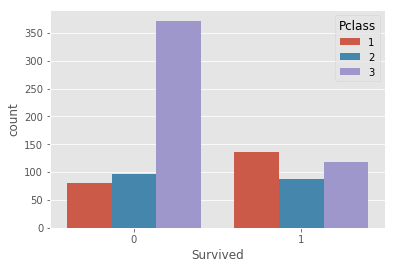

In [11]:
sns.countplot(train['Survived'], hue=train['Pclass'])
# Add contigency table for Pclass by Survived
pd.crosstab(train['Pclass'],train['Survived'], normalize='index')

### 3.4 Check age information and Survival by Age

* We can see that there are some children and very senior people on the boat
* Children under 10 has more than 50% of survival rate
* The survival rate decreases as age grow. Child under 5% has survival rate of 67.5% and senior people >60 has only survival rate of 27%

(array([30., 14., 10., 14.,  3., 29., 39., 65., 73., 42., 65., 62., 33.,
        47., 38., 21., 28., 21., 16., 14., 15.,  7.,  9.,  8.,  4.,  0.,
         5.,  1.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <a list of 30 Patch objects>)

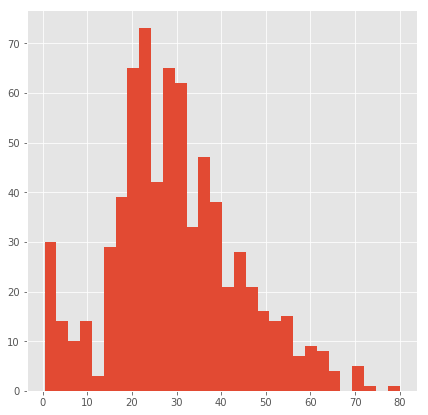

In [12]:
plt.figure(figsize=(7,7))
plt.hist(train['Age'].dropna(), bins=30)
# We can see that there are some children and very senior people on the boat

* Create age group and check the relationship between Survived and Age

In [13]:
print('The minimum age is: ', train['Age'].min())
print('The maximum age is: ', train['Age'].max())

def age_group(Age):
    if Age<5:
        return "Group 1: < 5 Years old"
    elif Age<10:
        return "Group 2: 5-10 Years old"
    elif Age<20:
        return "Group 3: 10-20 Years old"
    elif Age<40:
        return "Group 4: 20-40 Years old"
    elif Age<60:
        return "Group 5: 40-60 Years old"
    else:
        return "Group 6: >= 60 Years old"
train['Age_Group']=train['Age'].apply(age_group)

The minimum age is:  0.42
The maximum age is:  80.0


Survived,0,1
Age_Group,,
Group 1: < 5 Years old,0.325000,0.675000
Group 2: 5-10 Years old,0.500000,0.500000
Group 3: 10-20 Years old,0.598039,0.401961
Group 4: 20-40 Years old,0.612403,0.387597
Group 5: 40-60 Years old,0.605839,0.394161
Group 6: >= 60 Years old,0.709360,0.290640


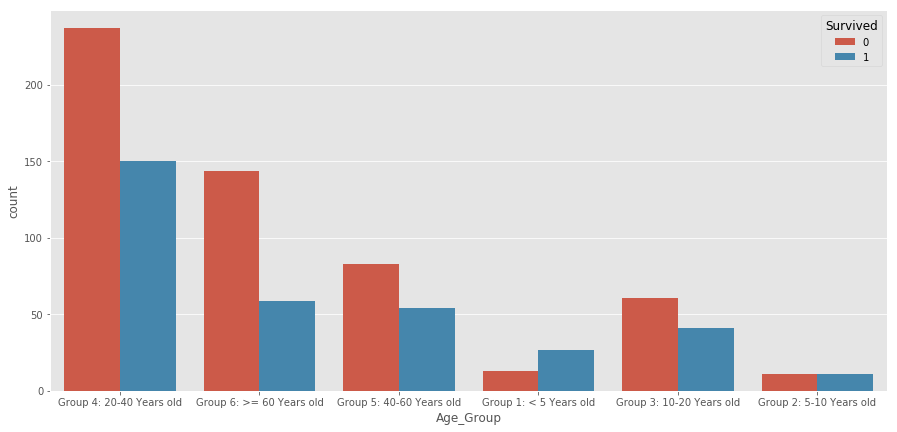

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(train['Age_Group'], hue=train['Survived'])
pd.crosstab(train['Age_Group'],train['Survived'], normalize='index' )

### 3.5 Survived and number of Sibling and spouse

sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

(1) Most people do not have siblings or spouses on boat

(2) People with 1 sibling or spouse has highest survival rate of 53.6%

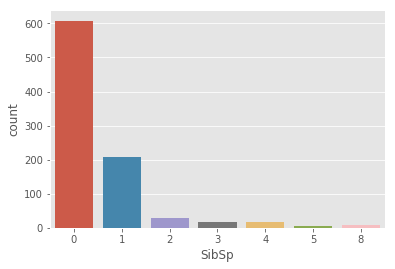

In [15]:
# Check the number of siblings and spouse
sns.countplot(train['SibSp'])
# Most people do not have siblings or spouses on boat

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


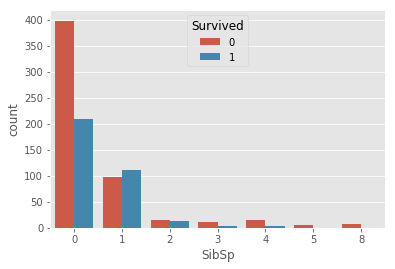

In [16]:
sns.countplot(train['SibSp'], hue=train['Survived'])
pd.crosstab(train['SibSp'], train['Survived'], normalize='index')

### 3.6 Survived and number of Parent/Child

parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

(1) Most people do not bring parents or children

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


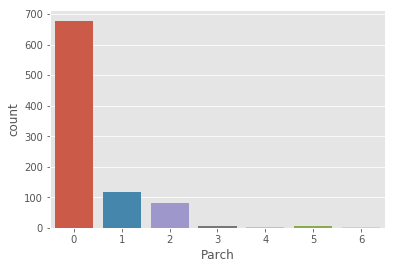

In [17]:
# Check number of parents or children, 
print(train['Parch'].value_counts())
sns.countplot(train['Parch'])
# Most people do not bring parents or children

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000


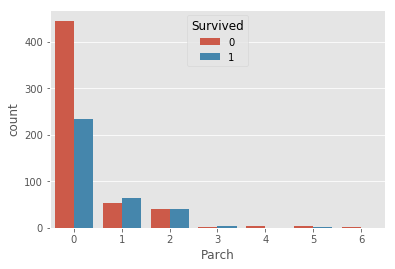

In [18]:
sns.countplot(train['Parch'], hue=train['Survived'])
pd.crosstab(train['Parch'], train['Survived'], normalize='index')

### 3.7 Survived and Fare

* Most of the Fare price are under 50
* People with Fare price >50 are more likelily to survive than people with Fare price <50. This is consistent with the Pclass.

C:\Users\zhang\Anaconda3 new\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


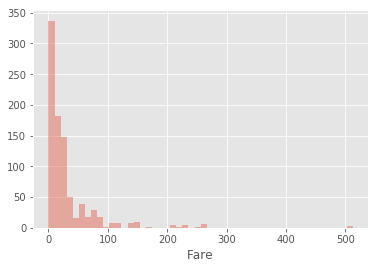

In [19]:
sns.distplot(train['Fare'], kde=False)

In [20]:
# Create categorical variables for Fare to check whether Survived has relationship with Fare Price
print(train['Fare'].min())
print(train['Fare'].max())
def fare_cat(Fare):
    if Fare<50:
        return "C1: <50"
    elif Fare<100:
        return "C2: <100"
    elif Fare<200:
        return "C3: <200"
    elif Fare<300:
        return "C4: <300"
    else:
        return "C5: >=300"
train['Fare_Cat']=train['Fare'].apply(fare_cat)
print(pd.crosstab(train['Fare_Cat'], train['Survived']))
print(pd.crosstab(train['Fare_Cat'], train['Survived'], normalize='index'))

0.0
512.3292
Survived     0    1
Fare_Cat           
C1: <50    497  233
C2: <100    38   70
C3: <200     8   25
C4: <300     6   11
C5: >=300    0    3
Survived          0         1
Fare_Cat                     
C1: <50    0.680822  0.319178
C2: <100   0.351852  0.648148
C3: <200   0.242424  0.757576
C4: <300   0.352941  0.647059
C5: >=300  0.000000  1.000000


### 3.8 Survived and Embarked

Port of Embarkation 
* C = Cherbourg, 
* Q = Queenstown, 
* S = Southampton 

People embarked at Cherbourg has survival rate of 55% which is much higher than the other two ports. Possibly because people at Cherbourg are richer.

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


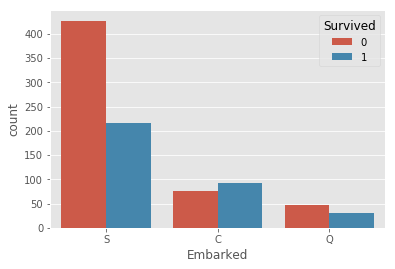

In [21]:
sns.countplot(train['Embarked'], hue=train['Survived'])
pd.crosstab(train['Embarked'],train['Survived'], normalize='index')

### 3.9 Drop 'PassengerId', 'Name','Ticket' which seems not correlated with survival

* Name, Ticket Number and PassengerId seems not correlated with Survived, we will drop them for now

In [22]:
# Drop variables not correlated
train.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)

TestId=test['PassengerId']
test.drop(['PassengerId', 'Name','Ticket'], axis=1, inplace=True)

In [23]:
train.drop(['Age_Group', 'Fare_Cat'], axis=1, inplace=True)

1. First we will use the numeric Age and Fare in the model
2. Next we will use the Age_Group and Fare_Cat

 ## Part 4: Check and impute missing values

Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64

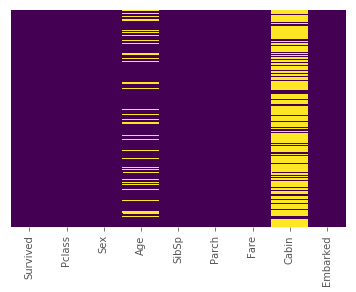

In [24]:
# use seaborn.heatmap to check NAN values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# From the heatmap, Age has some NAN values and most of the Cabin are missing, Embarked has few missing values
# Check missing percentage
train_nan_pct=((train.isnull().sum())/(train.isnull().count())).sort_values(ascending=False)
train_nan_pct[train_nan_pct>0]

In [25]:
# Drop the Cabin columns since too many NAN
train.drop(['Cabin'], axis=1, inplace=True)

# Since Age is skewed, impute with median
train['Age'].fillna(train['Age'].median(), inplace=True)
# Fill the numeric Embarked with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

Cabin    0.782297
Age      0.205742
Fare     0.002392
dtype: float64

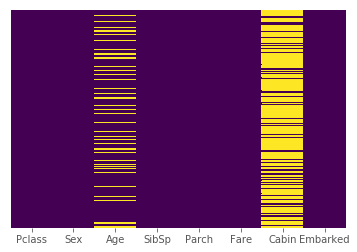

In [26]:
# use seaborn.heatmap to check NAN values for test data
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# From the heatmap, Age has some NAN values and most of the Cabin are missing, Fare has few missing values
# Check missing percentage
test_nan_pct=((test.isnull().sum())/(test.isnull().count())).sort_values(ascending=False)
test_nan_pct[test_nan_pct>0]

In [27]:
test.drop(['Cabin'], axis=1, inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Check whether impute Age by Pclass will imporve prediction performance

## Part 5: Create dummy variables for categorical variables

scipy.sklearn could not deal with categorical variables directly. So we need to first create dummy variables. We use drop_first=True to avoid multicolinearity

In [28]:
train=pd.get_dummies(train, drop_first=True)
test=pd.get_dummies(test, drop_first=True)

## Part 6: Build Logistic Regression to predict survival

Logistic regression is a classifical statistical model for classification and is good for intepretation. For logistic regression, we build the hypothesis function log((p(y=1|X))/(1-p(y=1|X)))=theta*X. So the probability of y=1 given X is p(y=1|X)=(exp(theta*X))/(1+exp(theta*X)). 

### 6.1 Train/validation split the train data set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(train.drop(['Survived'], axis=1), train['Survived'], test_size=0.3, random_state=100)

### 6.2 Logistic Regression

9565/score=0.74641

10.0
0.7910447761194029


C:\Users\zhang\Anaconda3 new\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  if sys.path[0] == '':


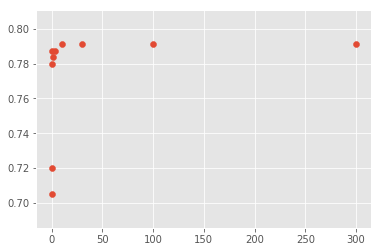

In [30]:
from sklearn.linear_model import LogisticRegression
cs=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300]
score=[]
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
for c in cs:
    lr=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=c, fit_intercept=True, intercept_scaling=1, class_weight=None)
    lr.fit(X_train, y_train)
    predicted=lr.predict(X_val)
    score.append(accuracy_score(predicted, y_val))
plt.scatter(x=cs, y=score)
score=pd.Series(score, index=cs)
print(score.argmax())
print(score.max())


6.0
The best accuracy score is:  0.7910447761194029


C:\Users\zhang\Anaconda3 new\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  if sys.path[0] == '':


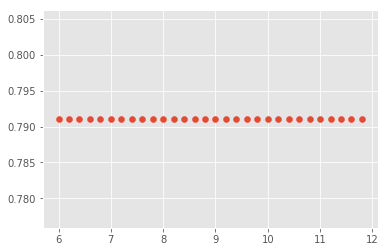

In [31]:
from sklearn.linear_model import LogisticRegression
cs=np.arange(6,12, 0.2)
score=[]
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
for c in cs:
    lr=LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=c, fit_intercept=True, intercept_scaling=1, class_weight=None)
    lr.fit(X_train, y_train)
    predicted=lr.predict(X_val)
    score.append(accuracy_score(predicted, y_val))
plt.scatter(x=cs, y=score)
score=pd.Series(score, index=cs)
print(score.argmax())
print("The best accuracy score is: ", score.max())

In [32]:
lr=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=6, fit_intercept=True, intercept_scaling=1, class_weight=None)
lr.fit(train.drop(['Survived'], axis=1), train['Survived'])
test_predicted=lr.predict(test)

In [33]:
submission=pd.DataFrame()
submission['PassengerId']=TestId
submission['Survived']=test_predicted
submission.to_csv('submission.csv', index=False)

## Part 7. SVM classifier

### 7.1 Normalize the numeric features

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True)
sub_features=train[['Age','Fare']]
sub_features
scaler.fit(sub_features)
scaler.fit_transform(sub_features)

array([[-0.56573646, -0.50244517],
       [ 0.66386103,  0.78684529],
       [-0.25833709, -0.48885426],
       ...,
       [-0.1046374 , -0.17626324],
       [-0.25833709, -0.04438104],
       [ 0.20276197, -0.49237783]])

In [35]:
train[['Age','Fare']]=scaler.fit_transform(sub_features)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(train.drop(['Survived'], axis=1), train['Survived'], test_size=0.3, random_state=100)

### 7.2 Build simple SVC model

Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

In [37]:
from sklearn.svm import SVC
svc=SVC(C=1, kernel='rbf', tol=0.001)
svc.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 7.2 Model evaluation

In [38]:
predicted=svc.predict(X_val)
print(confusion_matrix(y_val, predicted))
print('\n')
print(classification_report(y_val, predicted))
print('\n')
print('Accuracy score is: ', accuracy_score(y_val, predicted))
# The accuracy score is not good by using the above parameters. We will tune the hyperparameters using GridSearchCV

[[143  16]
 [ 33  76]]


             precision    recall  f1-score   support

          0       0.81      0.90      0.85       159
          1       0.83      0.70      0.76       109

avg / total       0.82      0.82      0.81       268



Accuracy score is:  0.8171641791044776


### 7.3 GridSearchcv to tune hyperparameters

* GridSearchCV exhaustive search over specified parameter values for an estimator.

In [39]:
# Create a dictionary called param_grid and fill out some parameters for C and gamma.
# 'gamma':auto has  aaccuracy score of 0.8260
#param_grid = {'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300], 'kernel': ['rbf'], 'gamma':['auto']}
# 'gamma':[0.1] has better aaccuracy of 0.8271
param_grid = {'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300], 'kernel': ['rbf'], 'gamma': [10,1,0.1,0.01,0.001,0.0001]}

from sklearn.model_selection import GridSearchCV
# we can specify scoring='accuracy' (default), 'precision', 'f1', 'recall' to choose parameters
grid=GridSearchCV(SVC(), param_grid, verbose=1,  scoring='accuracy', refit=True)
grid.fit(train.drop(['Survived'], axis=1), train['Survived'])

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    4.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300], 'kernel': ['rbf'], 'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [40]:
# The best hyperparameters chosen is
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

{'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Mean cross-validated score of the best_estimator:  0.8271604938271605
The number of cross-validation splits (folds/iterations):  3


In [41]:
# Re-tune the hyperparameters based on previous results C=9, gamma=0.05, 0.8316498316498316
param_grid = {'C': np.arange(1,20), 'kernel': ['rbf'], 'gamma': [0.01,0.03,0.04, 0.05, 0.06, 0.07, 0.1,0.13,0.15,0.17,0.2,0.23,0.25,0.27,0.3]}

from sklearn.model_selection import GridSearchCV
# we can specify scoring='accuracy' (default), 'precision', 'f1', 'recall' to choose parameters
grid=GridSearchCV(SVC(), param_grid, verbose=1,  scoring='accuracy', refit=True)
grid.fit(train.drop(['Survived'], axis=1), train['Survived'])

# The best hyperparameters chosen is
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

Fitting 3 folds for each of 285 candidates, totalling 855 fits
{'C': 9, 'gamma': 0.05, 'kernel': 'rbf'}
SVC(C=9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Mean cross-validated score of the best_estimator:  0.8316498316498316
The number of cross-validation splits (folds/iterations):  3


[Parallel(n_jobs=1)]: Done 855 out of 855 | elapsed:   21.0s finished


### Use all training data to fit model with the best parameters
{'C': 9, 'gamma': 0.05, 'kernel': 'rbf'}


### Normalize the test features

In [42]:
test_sub_features=test[['Age','Fare']]
test_sub_features
scaler.fit(test_sub_features)
scaler.fit_transform(test_sub_features)
test[['Age','Fare']]=scaler.fit_transform(test_sub_features)

In [43]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,0.386231,0,0,-0.497413,1,1,0
1,3,1.371370,1,0,-0.512278,0,0,1
2,2,2.553537,0,0,-0.464100,1,1,0
3,3,-0.204852,0,0,-0.482475,1,0,1
4,3,-0.598908,1,1,-0.417492,0,0,1


In [44]:
svc=SVC(C=9, gamma=0.05, kernel='rbf', tol=0.001)
svc.fit(train.drop(['Survived'], axis=1), train['Survived'])
test_predicted=svc.predict(test)
submission=pd.DataFrame()
submission['PassengerId']=TestId
submission['Survived']=test_predicted
submission.to_csv('submission.csv', index=False)